# Кластеризация K-средних - K-Means Clustering

---
## Общие понятия

Кластеризация ищет в **неразмеченных данных** похожие данные, и объединяет их в группы(кластеры), чтобы разбить все данные на отдельные группы. **Очень важно: мы не знаем каких-либо истинных значений целевой переменной!**

Основные идеи кластеризации:
* С помощью признаков мы выбираем точки, наиболее близкие к другим точкам
* У нас нет истинных значений целевой переменной y, чтобы сравнить с ними результаты кластеризации
* Кластеризацию можно представить себе как процесс, который "обнаруживает" возможные значения целевой переменной

### Рассмотрим на примере

Рассмотрим набор данных, который хотелось бы разбить на кластеры:

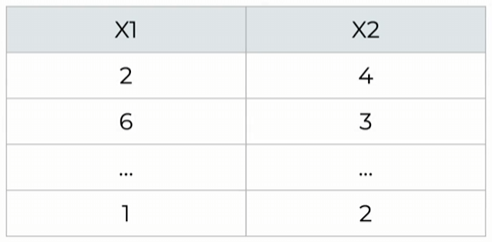

Есть два признака X1 и X2 без целевой переменной y, которая бы могла указать к какому классу принадлежит та или иная точка. Как в таком случае можно объединить данные в кластеры?

**Вариант 1** - нанести данные на график и посмотреть, видны ли на графике какие-либо кластеры точек:

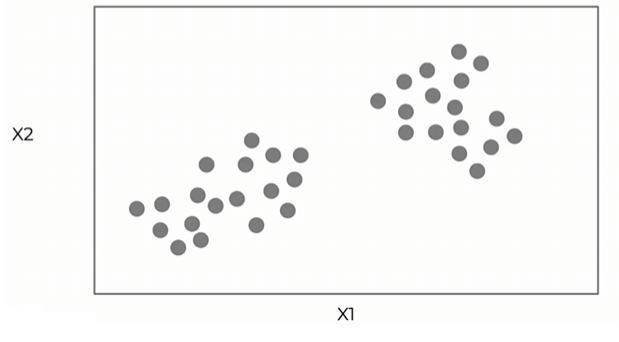

На этом графике, интуитивно мы видим две группы точек. Мы не знаем со 100% уверенностью, что это два разных кластера точек, но в принципе, на основе дистанции между точками, вполне можно определить эти два класса:

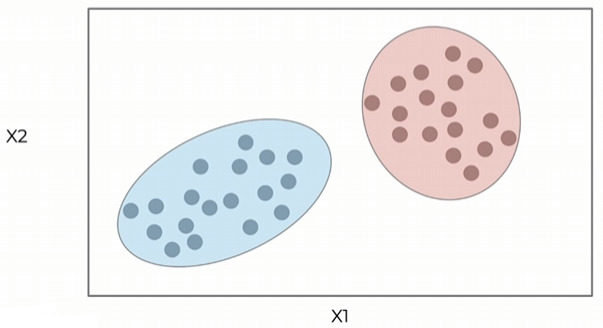

То есть, мы говорим, что те точки, которые находятся близко друг к другу - являются похожими друг на друга, потому что у них значения признаков очень близки друг к другу.

В этом и есть логика практически всех алгоритмов кластеризации - они объединяют вместе те точки, которые находятся рядом друг с другом по какой-то метрике на основе признаков. В итоге, мы назначаем значения классов для точек и по сути, как бы сами создаём целевую переменную - в данном случае с двумя классами:

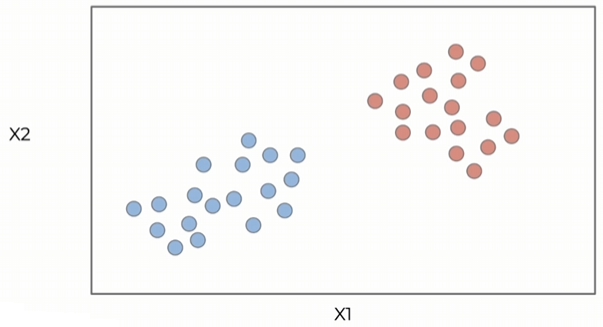

### Что делать в случае, если кластеры не такие очевидные или если измерений много?

К примеру, на графике ниже, уже сложнее определить сколько здесь классов:

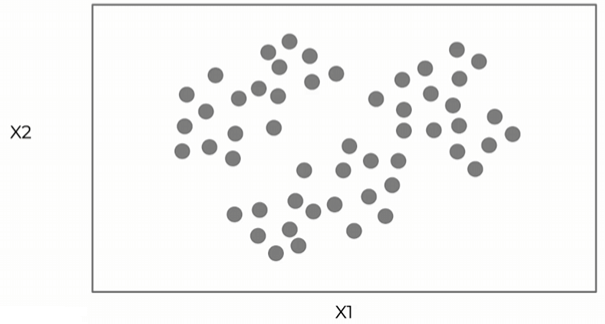

Можно выбрать как два кластера:

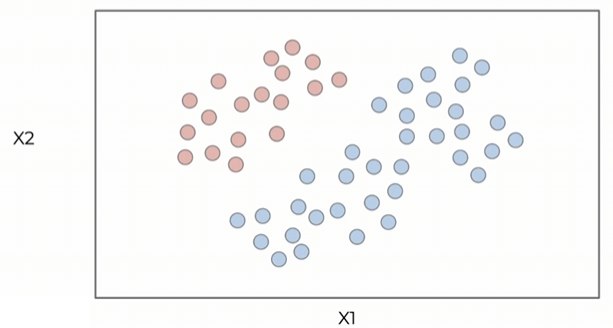

Так и три кластера:

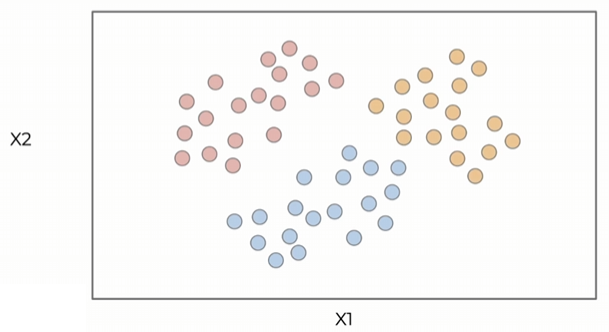

Здесь у нас нет понимания, какой из этих двух ответов является правильным. В таком случае, можно применять различные методики для определения количества кластеров.

**Важно: кластеризация не даёт "смысловые" названия, потому что на входе у алгоритма нет значений истинной целевой переменной.** Вместо этого, такой алгоритм вернёт названия похожие на: Group:0, Group:1, Group:2 и т.д. Далее уже задача специалиста посмотреть на данные и постараться понять, как можно назвать полученные группы данных.

---
## Как работает Кластеризация K-средних

Рассмотрим некоторый пример неразмеченных данных, **задача** для которого будет заключаться в следующем:
* Каждая точка должна принадлежать к какому-то кластеру
* Каждая точка может принадлежать только к одному кластеру(одна точка не может принадлежать к нескольким кластерам)

В примере будет два признака с целью того, чтобы точки можно было нарисовать на графике. Но такой процесс можно также применять и для множества признаков.

0) Начинаем с неразмеченных данных, в которых есть только признаки:

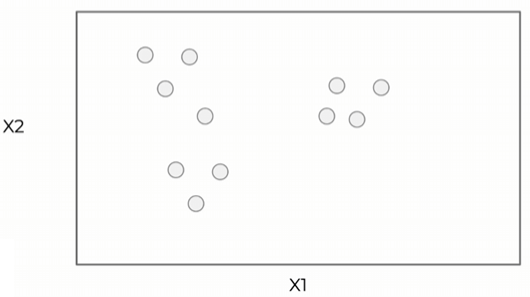

Если бы данные были размечены - кластеризация данных вообще не была бы нужна, так как у нас уже были бы разбиения точек на отдельные классы.

**1)** Выбираем количество кластеров (K), которые будем создавать. Значение K должно быть выбрано перед началом работы алгоритма. В данном пример рассмотрим K=3. **Важно: в большинстве задач может не быть возможности визуализировать данные, так что не получится визуально определить количество кластеров.**

**2)** Случайно выбираем K различных точек. В нашем примере K=3, так что выберем три точки:

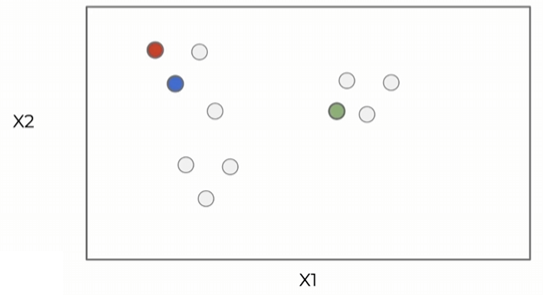

Это будут три начальные точки, которые мы будем трактовать как центры кластеров.

**3)** Для остальных точек берём цвет ближайшей "кластерной" точки:

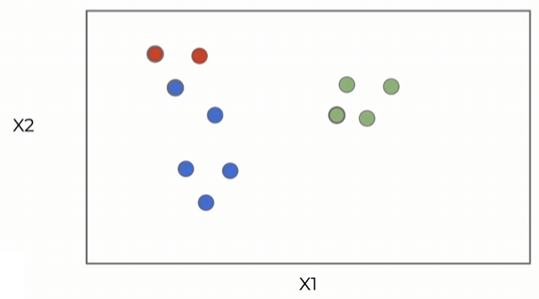

Здесь мы использовали метрику расстояния между точками.

**4)** Вычисляем центр для каждого кластера - средние значения векторов, обозначим их треугольниками:

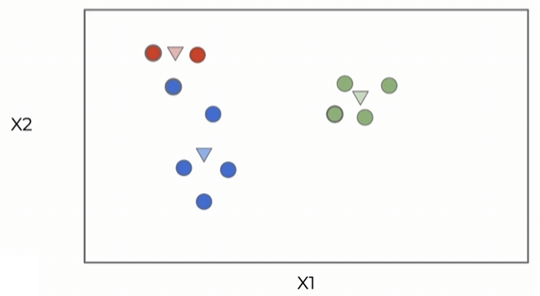

Треугольники не являются новыми точками - это просто центры трёх кластеров точек.

**5)** Выполняем очередную итерацию цикла - каждой точке назначаем кластер с ближайшим центром:

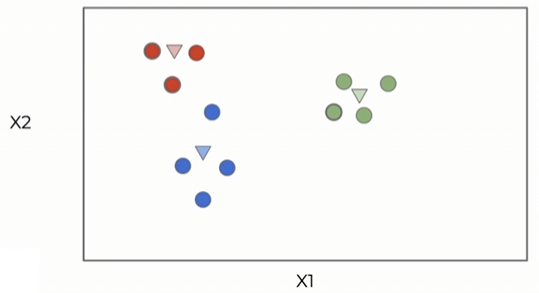

Далее мы повторяем шаги 4 и 5 до тех пор, пока все точки не "найдут" свои цвета. Если точки не меняют свои цвета, то процесс завершён - кластеры найдены.

---
## Как выбрать значение K?

### Метод локтя

Рассмотрим набор точек, который можно визуально разбить на два кластера:

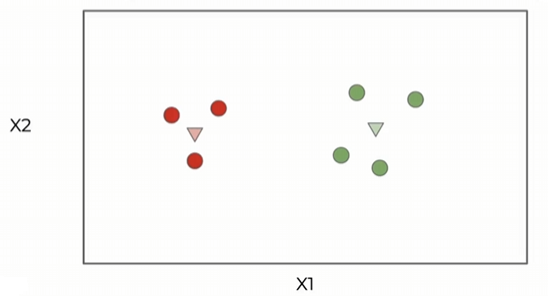 

Как здесь можно понять, насколько хорошее значение K мы выбрали?

Можно вычислить сумму квадратов расстояний от точек до центров кластеров (SSD - Sum of Squared Distances). Причём мы будем брать квадраты расстояний, чтобы штрафовать большие расстояния между точками и центрами кластеров. Эта метрика чем-то похожа на метрику RMSE, когда измерялись квадраты расстояний между известными значениями и предсказанными значениями, но здесь расстояние вычисляется от точек до центров кластеров.   
Эта метрика вычисляется отдельно для каждого кластера, а затем её можно усреднить для всего набора точек. Хороший кластер должен быть компактным.

В этом случае необходимо соблюсти некоторый баланс. Допустим, что K увеличилось на 1 и теперь у нас три класса:

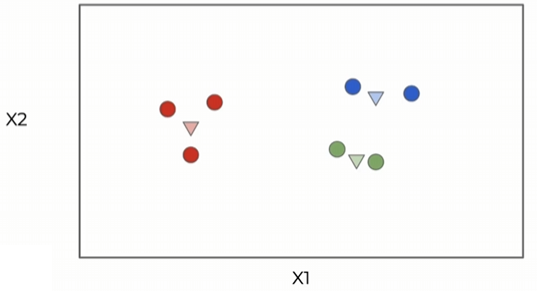

Мы заново вычисляем сумму квадратов расстояний и здесь можно заметить, что при увеличении K - эти суммы начинают уменьшаться. В максимальном случае, когда K равно количеству точек, то сумма квадратов расстояний будет равна 0, потому что в каждом кластере будет одна точка, но это не то решение задачи, которое требуется найти, поэтому мы не обязаны минимизировать сумму квадратов расстояний. SSD просто используется как инструмент для анализа модели.

Таким образом, можно пременить метод локтя:
* Вычисляем метрику SSD для различных значений K
* Ищем те моменты, **где метрика SSD уменьшается не так сильно, как в других точках**
* Это позволит увидеть, что увеличение K на 1, не приводит к существенной разнице в разбиении данных на кластеры, т.е. увеличивая K на 1 мы не получаем более компактные кластеры.

Например, начинаем с K=2, вычисляем SSD и наносим значение на график:

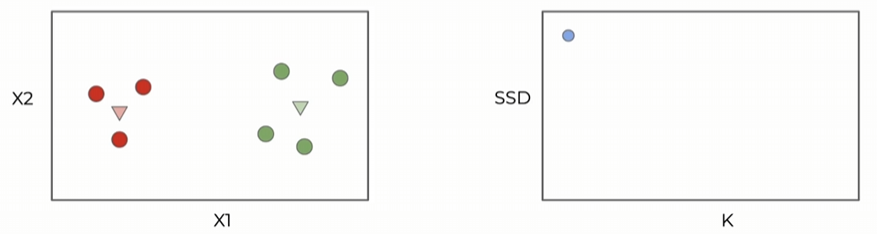

Далее, увеличиваем K на 1, вычисляем SSD и снова наносим значение на график:

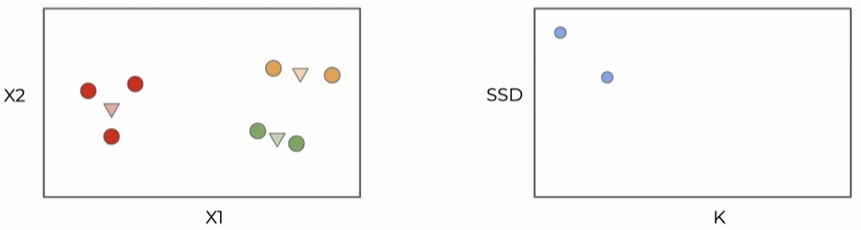

В какой-то момент, кластеры начнут состоять из одной точки:

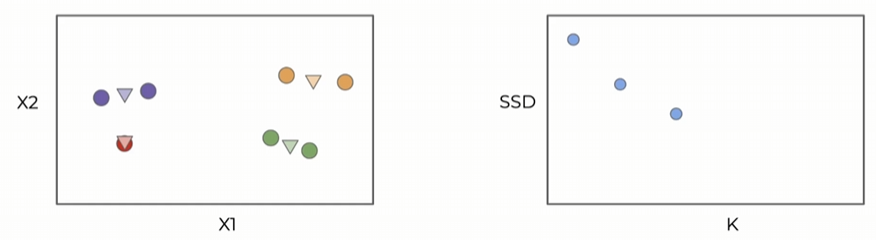

Теоретически, можно увеличивать значение K вплоть до количества точек, что явно является излишним, особенно для больших наборов точек.

В итоге мы получим постепенное уменьшение SSD:

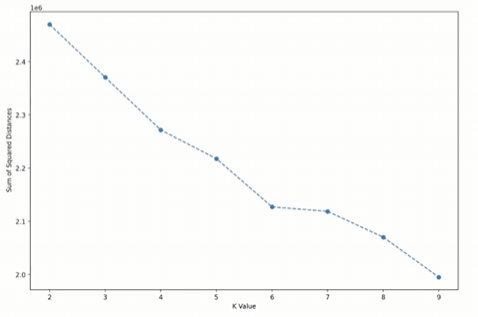

Это более менее линейный график, можно заметить что при переходе от K=6 до K=7 более плавный, чем в других точках, т.е. можно сказать, что если мы возьмём K=6 и увеличим его до K=7, то такое увеличение не приведёт к существенному уменьшению SSD.

Если же попробовать увеличить K ещё больше, то можно получить следующий график:

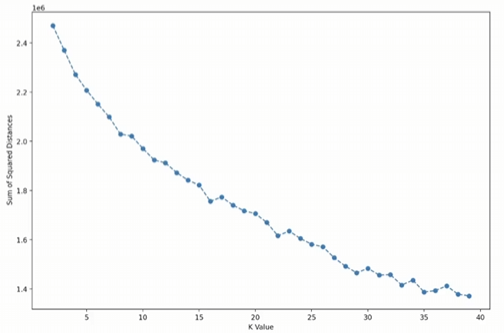

Здесь можно выделить следующие точки:

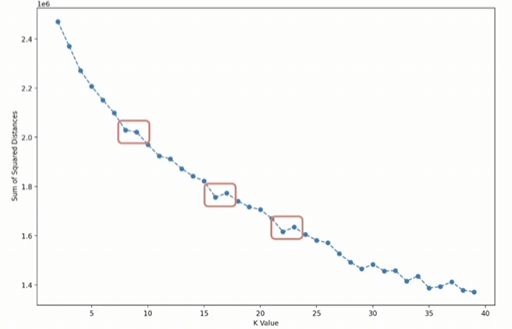

Также надо отметить, что с увеличением K - этот график уменьшается до нуля. Это отличается от тех графиков, которые были для других моделей машинного обучения, которые могли выходить на некоторое плато и далее практически не уменьшаться.

Можно наметить для себя отдельные точки, где имеет смысл сделать остановку и сказать, что получено некоторое осмысленное количество кластеров. Но здесь нет однозначного ответа, какое значение K - наилучшее.

В итоге, мы находим такие точки K, в которых увеличение K на 1 не приводит к существенному уменьшению метрики SSD, т.е. в этот момент мы не извлекаем существенно больше сигнала из данных.

Можно также изобразить **изменение** метрики SSD с помощью графика `barplot`.

### Метод силуэтов

Для примера возьмём какую-то одну точку на графике:

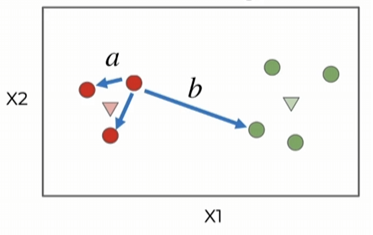

Для этой одной точки вычисляется два расстояния:
1) Среднее расстояние от этой точки до всех точек красного кластера, обозначим его $a$
2) Расстояние от этой точки до ближайшего соседнего кластера (в нашем случае зеленого), обозначим его как $b$

$$silhouette\text{ }score = \frac{b-a}{max(a,b)}$$

Эта метрика учитывает не только компактность кластера, но и удалённость кластеров друг от друга. Чем больше будет значение этой метрики, тем лучше. 

Чем удалённее кластеры друг от друга, тем больше значение $b$, а чем компактнее кластеры, тем значение $a$ меньше, но поскольку в формуле оно идёт со знаком минус, то получается, чтобы максимизировать эту метрику, нужно большее значение $b$ (удалённость кластеров) и меньшее значение $a$ (компактность кластеров).

Метрика Silhouette Score вычисляется на трёх разных уровнях:
* Для каждой отдельной точки
* Среднее для одного кластера
* Среднее для всех кластеров

Значения метрики меняются в диапазоне от -1 до +1:
* 1 - отличные кластеры
* 0 - плохие кластеры
* <0 - пересечение кластеров

Далее можно сделать следующее - вычислить Silhouette Score для различных значений K и нанести полученные результаты на график:

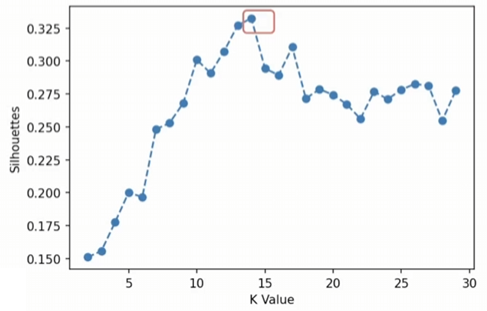

В этом случае - график возрастает и правильно будет сказать что мы ищем точку "колена". Так, в районе K=15 мы получаем некоторое максимальное значение, а затем, значения становятся уже меньше.

**Из этого графика нельзя сделать вывод, что K=15 - это наилучшее значение.** Может быть так, что какие-то меньшие значения K подойдут лучше, даже если у них меньше значение Silhouette Score.

Рассмотрим пример, когда кластера всего два:

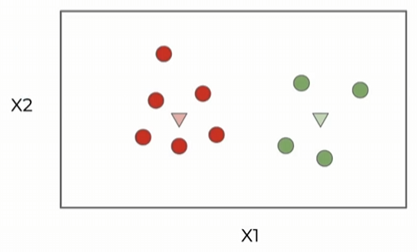

Для каждой точки красного кластера вычислим метрику Silhouette Score:

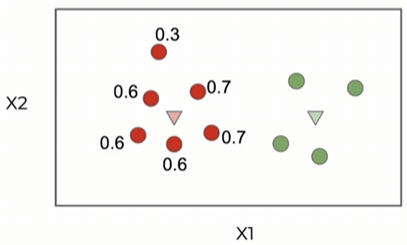

Шесть полученных чисел нанесём на график:

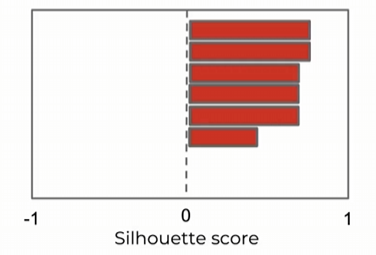

На графике по горизонтальной оси будет откладываться метрика Silhouette Score - это значения от -1 до 1. Для каждой из шести точек нарисованы горизонтальные линии, длина которой равна метрике Silhouette Score для этой точки. Сначала рисуются линии с большими значениями Silhouette Score, а затем постепенно переходят к маленьким значениям.

Такой график строится отдельно для каждого кластера точек. Например:

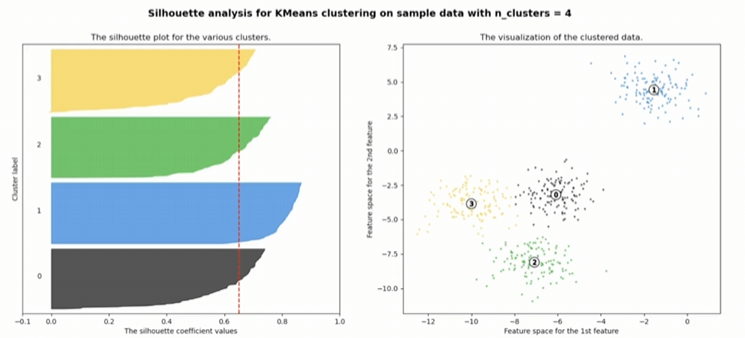

Здесь на левом графике внутри каждого кластера есть множество линий различной длины, каждая такая горизонтальная линия - это отдельная точка в нашем исходном наборе точек, длина которой равна значению метрики Silhouette Score для той или иной конкретной точки.

Вертикальная пунктирная линия - это среднее значение Silhouette Score для всех точек. Часть точек, которая находится правее этой пунктирной линии означает, что нет каких-то кластеров, которые полностью отстают от средних значений. Это среднее значение ближе к 1, чем к 0.

Такой график можно построить и для случая многих признаков, в отличие от правого графика, который будет невозможно построить, если признаков будет слишком много.

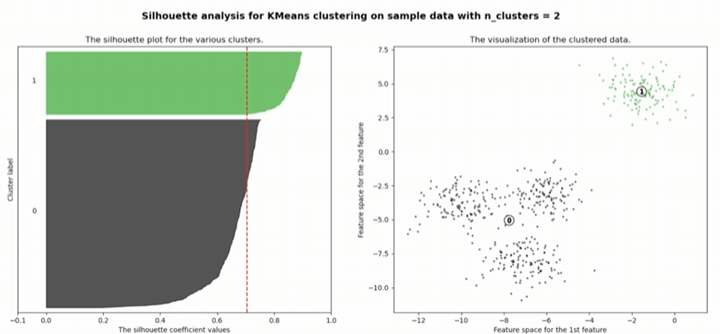

Здесь, для случая двух кластеров, тёмно-серый кластер намного толще по вертикали, чем зелёный - это означает, что в нём больше точек.

Насколько такое разбиение можно считать хорошим?   
Судя по правом графику - разбиение является достаточно хорошим. Зелёные точки находятся достаточно далеко от серых, которые в свою очередь хорошо выглядят как единый кластер.

В данной задаче можно выбрать как K=4, так и K=2.

На левом графике: красная пунктирная линия принимает достаточно хорошее значение; в каждом кластере есть часть точек, которая принимает значение Silhouette Score большее, чем среднее значение; толщина кластеров - не является критичной, так как в разных кластерах находится разное количество точек.

Для k=3:

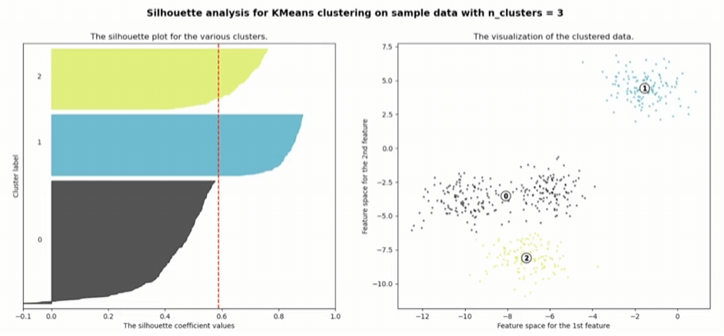

Серый кластер не дотягивается до красной пунктирной линии, т.е. он выглядит хуже, чем среднее значение; также, в этом кластере есть точки с низким значением Silhouette Score. На правом графике этот кластер достаточно вытянутый и некоторые его точки очень близки к жёлтому кластеру и как следствие этого - наблюдаются более низкие значения на левом графике.

---
## Квантование цветов

Компьютер хранит изображение в виде массива со значениями в некотором диапазоне:

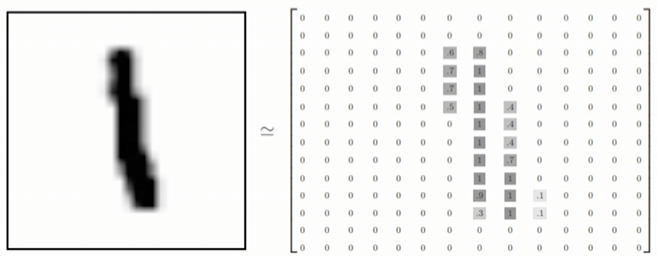

Здесь изображен штрих, для которого:
* 0 - белый цвет
* 1 - чёрный цвет
* Промежуточные значения - оттенки серого цвета

Зачастую цвета хранятся в диапазоне 0-255 - этот диапазон соответствует 8 битам или 1 байту. 

Цветные изображения можно представить как комбинацию цветов Красный, Зелёный и Синий.

### В каком виде хранится изображение

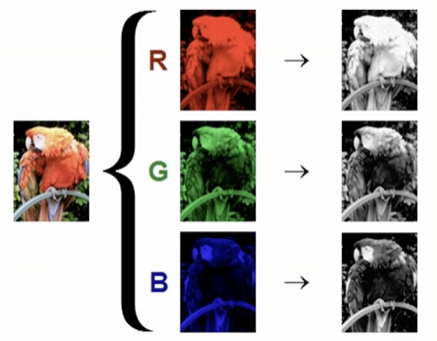

Такое изображение хранится в виде трёхмерного массива, в котором первые две размерности - ширина и высота изображения, а третье измерение содержит три цвета - красный, зелёный и синий.

В ячейках трёхмерного массива хранятся числа от 0 до 255, обозначающие интенсивность цвета в той или иной точке. Если взять такое изображение и посмотреть размерность массива, то можно получить примерно такие значения: 

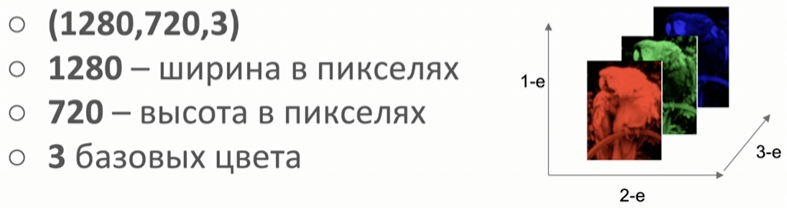

Замечание: компьютер на знает, какой из цветовых каналов за какой цвет отвечает, за вывод цветов отвечает монитор. Если взять какой-то отдельный цвет - то это будет двумерный массив чисел, такой же как чёрно-белое изображение с оттенками серого.

Если поменять цвета местами, то это приведёт к инверсии цветов.

### Как можно применить алгоритм Kmeans

Для примера возьмём изображение:

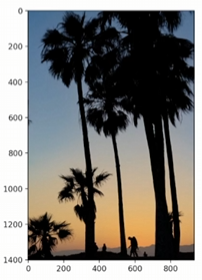

Допустим, мы хотим сократить количество цветов до 6. Каждый пиксель содержит компоненты RGB:

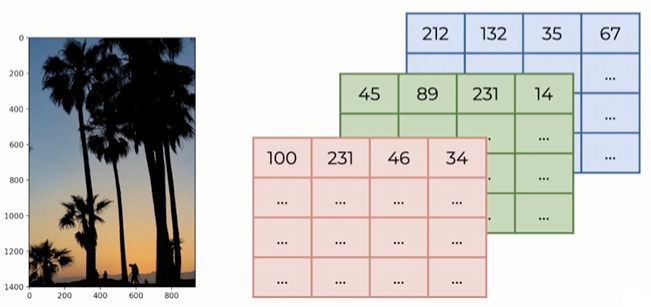

Можно поменять размерность массива таким образом, чтобы получился набор признаков X с тремя признаками - красный, зелёный и синий цвета. Это нужно для того, чтобы затем подать эти данные на вход в алгоритм кластеризации. 

Исходный трёхмерный массив преобразуется в следующий формат:

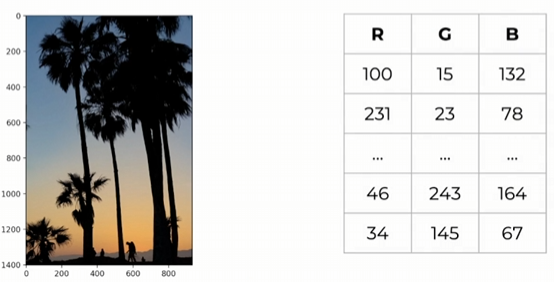

Каждая колонка в этом массиве соответствует одному из базовых цветов: 

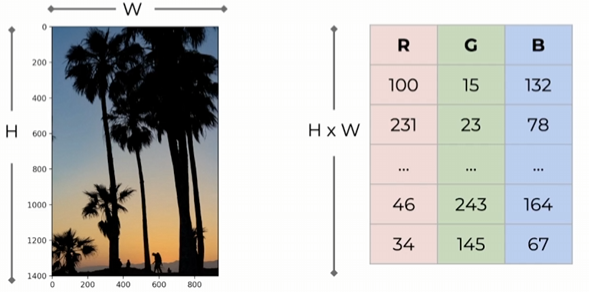

Получается, что каждый из трёх двумерных массивов был развёрнут в одну длинную колонку, высота которой равна H*W. В итоге, каждая строка в этом массиве - это отдельный пиксель.

После такого преобразования данных можно выбрать некоторое K - это будет количество цветов, а далее с помощью метода Kmeans создаим отдельные кластеры, где каждый кластер - некоторый усреднённый цвет.

Получаем ещё одну колонку в массиве с номерами кластеров для каждой точки:

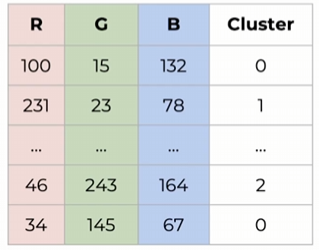

Каждый кластер имеет центр в N-мерном пространстве признаков, например, первая точка была отнесена к кластеру 0 - так что можно найти центр этого кластера, причём в терминах исходных признаков R, G, B.

Получается, что центр каждого кластера является некоторым средним цветом для целого набора точек. Например, взяли различные тёмно-синие цвета и объединили всё эти цвета в кластер с некоторым центром, причём этот центр имеет некоторый усреднённый тёмно-синий цвет. Это будет выполнено для того количества цветов K, которое было выбрано.

Далее, оставляем только те цвета, которые являются усреднёнными для каждого из кластеров. Например, для всех точек тёмно-синего цвета в кластере 0 можно взять цвет, который получился в центре кластера, и раскрасить этим цветом все точки в этом кластере точек. И так для каждого цвета. Такой процесс называется **квантованием цветов**.

Мы уменьшаем количество различных цветов, используемых в изображении, но таким образом, чтобы новое изображение было по возможности максимально похоже на исходное изображение. Количество цветов для этого изображения будет равно K.

---